In [1]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

In [2]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [4]:
adata = ad.read_h5ad('../cancer_single_cell_data/92_sc_healthy.h5ad')

In [5]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [6]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

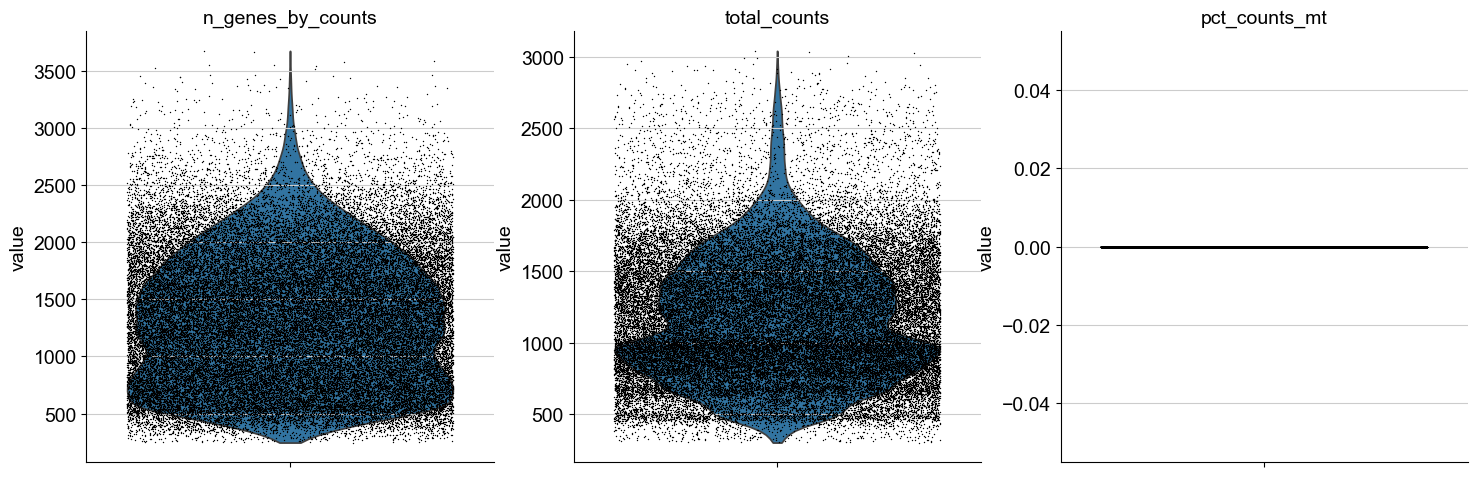

In [7]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

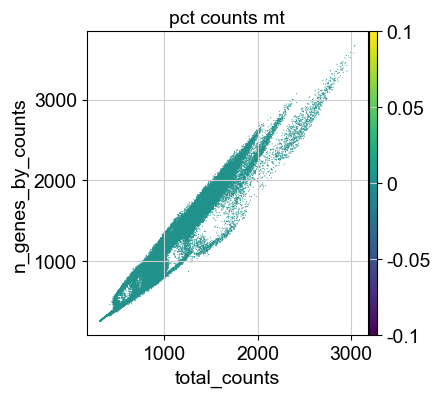

In [8]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [9]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [10]:
# Saving count data
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [11]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var['highly_variable']]

In [12]:
adata.write_h5ad('../cancer_single_cell_data/processed_data_2000.h5ad')

In [13]:
process_data = ad.read_h5ad('../cancer_single_cell_data/processed_data_2000.h5ad')

In [14]:
process_data

AnnData object with n_obs × n_vars = 51367 × 2000
    obs: 'mapped_reference_annotation', 'donor_id', 'donor_age', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'donor_menopausal_status', 'organism_ontology_term_id', 'donor_times_pregnant', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'menstrual_phase_at_collection', 'sample_source', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'reported_diseases', 'sex_ontology_term_id', 'celltype', 'ML_sub', 'Basal_sub', 'epi_sub', 'LP_sub', 'LHS_sub', 'LASP_sub', 'Group', 'Pool', 'nFeature_ATAC', 'nCount_RNA', 'nCount_SCT', 'nucleosome_perce